<a href="https://colab.research.google.com/github/WooShinJeon/Python25Study/blob/master/%EB%AA%A8%EB%8D%B8%20%EC%BC%80%EB%9D%BC%EC%8A%A4%20%ED%8C%8C%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

tf.config.experimental.enable_op_determinism()

from tensorflow import keras

(train_input, train_target), (
    test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


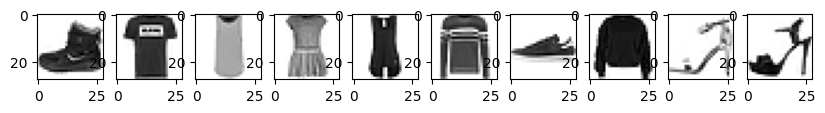

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('on')
plt.show()
# 0티셔츠, 1바지, 2스웨터, 3드레스, 4코트, 5샌달, 6셔츠, 7스니커즈, 8가방, 9앵클부츠

In [5]:
print([train_target[i] for i in range(10)])

[np.uint8(9), np.uint8(0), np.uint8(0), np.uint8(3), np.uint8(0), np.uint8(2), np.uint8(7), np.uint8(2), np.uint8(5), np.uint8(5)]


In [6]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [8]:
from sklearn.model_selection import cross_validate  # 크로스검증
from sklearn.linear_model import SGDClassifier      # 경사하강법

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8194166666666666


In [11]:
import tensorflow as tf

from tensorflow import keras

In [12]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape) # 훈련 세트 48,000 +
print(val_scaled.shape, val_target.shape) # 검증 세트     12,000 = 600000

(48000, 784) (48000,)
(12000, 784) (12000,)


In [14]:
dense = keras.layers.Dense(10,       activation='softmax', input_shape=(784,))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model = keras.Sequential([dense])

In [21]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
print(train_target[:10])
# 0티셔츠, 1바지, 2스웨터, 3드레스, 4코트, 5샌달, 6셔츠, 7스니커즈, 8가방, 9앵클부츠

[7 3 5 8 6 9 3 3 9 9]


In [18]:
model.fit(train_scaled, train_target, epochs=5)
# 훈련시작 (에포크 5로 5번 훈련 중....) 25초 정도 걸림

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7370 - loss: 0.7853
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8346 - loss: 0.4845
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8452 - loss: 0.4564
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8504 - loss: 0.4425
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8537 - loss: 0.4337


In [19]:
# 에포크마다 걸린시간, 정확도(accuracy), 손실(loss)
# 0.8537 높은 점수를 받음

# 케라스 모델의 성능 평가 하는 메서드 evaluate(이밸류에이트)
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8462 - loss: 0.4364


[0.4444445073604584, 0.8458333611488342]

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

# CCTV 패션 상품 인식 AI 모델
model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

# ★ 최적화 기법 적용(Adam 사용) ★
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   # 10개 다중 분류
    metrics=['accuracy']
)

print(">>> 최적화 기법(Adam) 적용 완료")

>>> 최적화 기법(Adam) 적용 완료


In [28]:
from tensorflow.keras import layers, models

# Dropout 적용하여 과대적합 방지
model = models.Sequential([
    layers.Dense(100, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),             # ★ 과대적합 방지 핵심
    layers.Dense(10, activation='softmax')
])

print(">>> 과대적합 방지(Dropout) 적용 모델 준비 완료")

>>> 과대적합 방지(Dropout) 적용 모델 준비 완료


In [29]:
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0973 - loss: 2.3196 - val_accuracy: 0.0948 - val_loss: 2.3028
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1010 - loss: 2.3030 - val_accuracy: 0.0949 - val_loss: 2.3028
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.0949 - val_loss: 2.3028
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.0949 - val_loss: 2.3028
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.0949 - val_loss: 2.3028


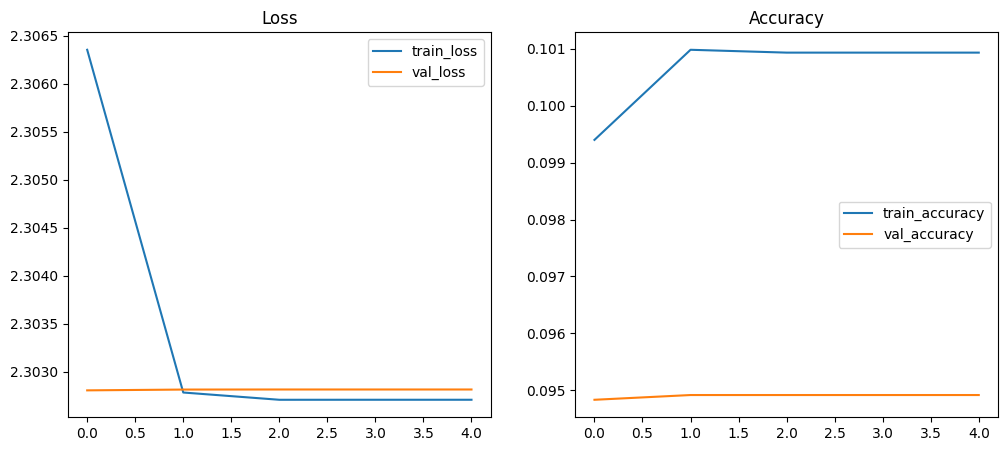

In [32]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# 1) 모델 정의
model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

# 2) ★ 반드시 필요한 compile ★
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 3) 훈련
history = model.fit(
    train_scaled,
    train_target,
    epochs=5,
    validation_data=(val_scaled, val_target)
)

# 4) 그래프 출력
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [33]:
model.save("cctv_fashion_model.keras")
print(">>> 모델 저장 완료: cctv_fashion_model.keras 생성됨")

>>> 모델 저장 완료: cctv_fashion_model.keras 생성됨


In [34]:
# 📌 ② 저장된 모델을 불러와서 검증세트 정확도를 확인

from tensorflow import keras

# ★ 저장된 모델 불러오기 ★
loaded_model = keras.models.load_model("cctv_fashion_model.keras")
print(">>> 저장된 모델 로드 완료")

# ★ 검증 정확도 출력 ★
val_loss, val_acc = loaded_model.evaluate(val_scaled, val_target)
print(f">>> 검증 정확도: {val_acc:.4f}")

>>> 저장된 모델 로드 완료
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0926 - loss: 2.3028
>>> 검증 정확도: 0.0949


In [35]:
# 📌 ③ 저장된 모델을 불러와 테스트 세트 점수 확인

from tensorflow import keras

# 저장된 모델 다시 로드
loaded_model = keras.models.load_model("cctv_fashion_model.keras")

# ★ 테스트 세트 평가 ★
test_loss, test_acc = loaded_model.evaluate(test_input.reshape(-1, 784)/255.0, test_target)
print(f">>> 테스트 정확도: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0973 - loss: 2.3196
>>> 테스트 정확도: 0.1004
